Final Cost Function Value: 0.2253345284951801
Learned Parameters: [ 0.46691589  2.55696688 -2.78058175]


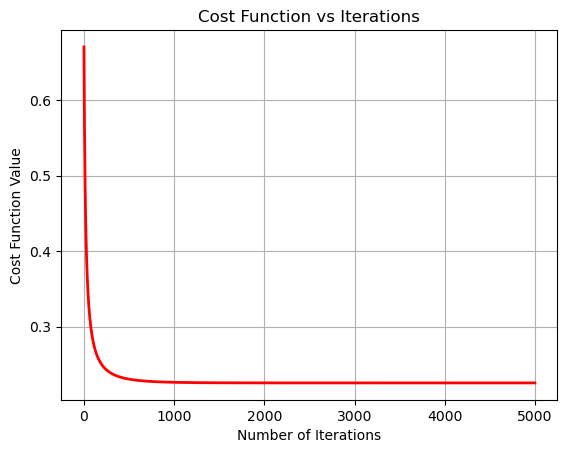

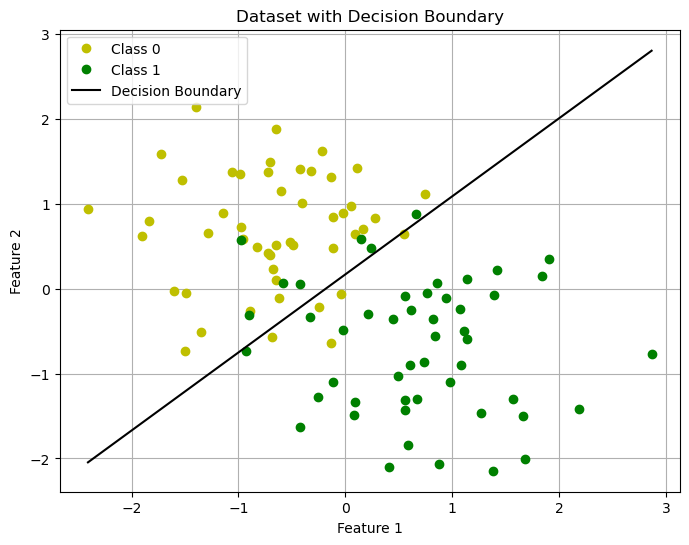

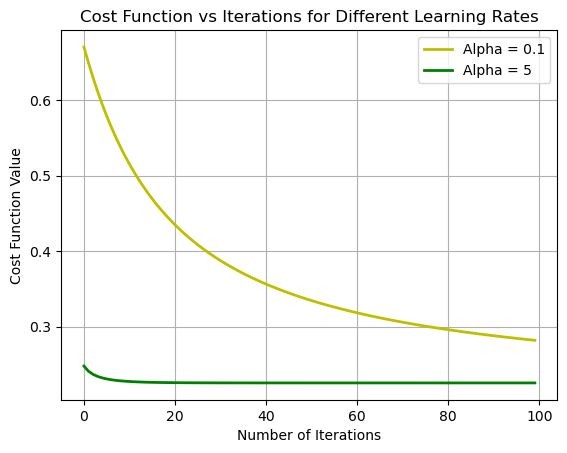

Confusion Matrix:
 Predicted  False  True 
Actual                 
0             44      5
1              7     43
Accuracy: 0.8788
Precision: 0.8958
Recall: 0.8600
F1-Score: 0.8776


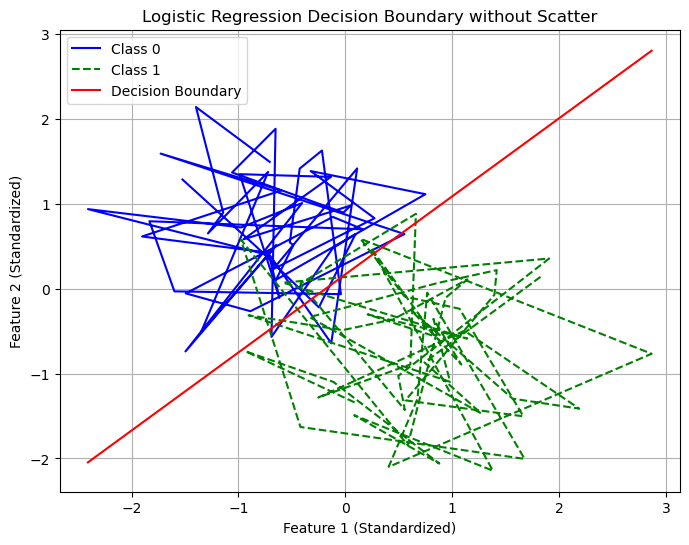

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load data from the given links (assuming you've downloaded the files)
X = pd.read_csv("logisticX.csv").values  # Independent/Predictor Variable
y = pd.read_csv("logisticY.csv").values  # Dependent/Response Variable

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []
    for _ in range(num_iters):
        gradient = (1/m) * (X.T @ (sigmoid(X @ theta) - y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Normalize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)
m, n = X.shape
X = np.c_[np.ones((m, 1)), X]  # Add intercept term

# Initialize parameters
theta = np.zeros((n + 1, 1))
alpha = 0.1  # Learning rate
num_iters = 5000

# Train the logistic regression model
final_theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

# Compute final cost
final_cost = compute_cost(X, y, final_theta)
print("Final Cost Function Value:", final_cost)
print("Learned Parameters:", final_theta.ravel())

# Plot cost function vs iterations
plt.figure()
plt.plot(range(num_iters), cost_history, 'r-', linewidth=2)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Iterations")
plt.grid(True)
plt.show()

# Plot dataset with decision boundary
plt.figure(figsize=(8, 6))
class_0 = X[y.flatten() == 0]
class_1 = X[y.flatten() == 1]
plt.plot(class_0[:, 1], class_0[:, 2], 'yo', label='Class 0')
plt.plot(class_1[:, 1], class_1[:, 2], 'go', label='Class 1')
x_vals = np.array([X[:, 1].min(), X[:, 1].max()])
y_vals = -(final_theta[0] + final_theta[1] * x_vals) / final_theta[2]
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Dataset with Decision Boundary")
plt.grid(True)
plt.show()

# Train with different learning rates
num_iters = 100
# Train with alpha = 0.1
theta_1 = np.zeros((n + 1, 1))
theta_1, cost_history_1 = gradient_descent(X, y, theta_1, alpha=0.1, num_iters=num_iters)
# Train with alpha = 5
theta_2 = np.zeros((n + 1, 1))
theta_2, cost_history_2 = gradient_descent(X, y, theta_2, alpha=5, num_iters=num_iters)

# Plot cost function vs iterations for different learning rates
plt.figure()
plt.plot(range(num_iters), cost_history_1, 'y-', label='Alpha = 0.1', linewidth=2)
plt.plot(range(num_iters), cost_history_2, 'g-', label='Alpha = 5', linewidth=2)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

# Confusion matrix and performance metrics
def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5

y_pred = predict(X, final_theta)
conf_matrix = pd.crosstab(y.flatten(), y_pred.flatten(), rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix:\n", conf_matrix)

accuracy = np.mean(y.flatten() == y_pred.flatten())
precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# Plot dataset with decision boundary (without scatter plot)
plt.figure(figsize=(8, 6))

# Plot lines for Class 0 (solid) and Class 1 (dashed)
class_0 = X[y.flatten() == 0]
class_1 = X[y.flatten() == 1]

plt.plot(class_0[:, 1], class_0[:, 2], 'b-', label='Class 0')  # Solid blue for Class 0
plt.plot(class_1[:, 1], class_1[:, 2], 'g--', label='Class 1')  # Dashed green for Class 1

# Plot decision boundary (red line)
x_vals = np.array([X[:, 1].min(), X[:, 1].max()])
y_vals = -(final_theta[0] + final_theta[1] * x_vals) / final_theta[2]
plt.plot(x_vals, y_vals, 'r-', label='Decision Boundary')  # Solid red for decision boundary

# Labeling the axes and the plot
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.title("Logistic Regression Decision Boundary without Scatter")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
